Processed 6 lines.


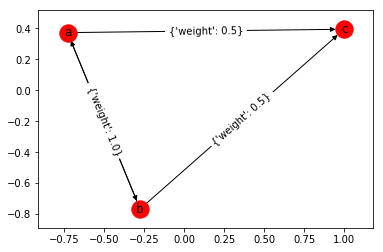

In [50]:
# Dependency Graph (DG) based prefetching technique
# Paper: Using Predictive Prefetching to Improve World Wide Web Latency, 1996

import networkx as nx
import matplotlib.pyplot as plt
import csv

DG = nx.DiGraph()
window_size = 3
file_name = '/Users/felicitia/Documents/workspaces/Python/Prefetch/aaa.csv'
url_buffer = []
time_idx = 1
url_idx = 2

def updateDG(url_buffer):
    head_node = url_buffer[0]
    successors = set()
    i = 1
    while i < len(url_buffer):
        if url_buffer[i] != head_node:
            successors.add(url_buffer[i])
        i += 1
    for suc in successors:
        if DG.has_edge(head_node, suc):
            old_weight = DG[head_node][suc]['weight']
            head_count = DG.nodes[head_node]['count']
            new_weight = (old_weight*head_count + 1) / (head_count + 1)
            DG[head_node][suc]['weight'] = new_weight
        else: # edge doesn't exist
            if DG.has_node(head_node):
                DG.add_edge(head_node, suc)
                # head_node has outgoing edges
                if 'count' in DG.nodes[head_node]: 
                    DG[head_node][suc]['weight'] = 1 / (DG.nodes[head_node]['count'] + 1)
                else:
                    DG[head_node][suc]['weight'] = 1 # initial weight for new edge (old_weight*head_count + 1) / (head_count + 1)
                    DG.nodes[head_node]['count'] = 0 # initial count for new node
            else:
                DG.add_edge(head_node, suc)
                DG[head_node][suc]['weight'] = 1 # initial weight for new edge (old_weight*head_count + 1) / (head_count + 1)
                DG.nodes[head_node]['count'] = 0 # initial count for new node
            
    DG.nodes[head_node]['count'] += 1    
    return

def drawGraph(dg):
    pos = nx.spring_layout(dg)
    nx.draw_networkx(dg, pos, with_lables=True)
    # node_labels = nx.get_node_attributes(dg,'count')
    # nx.draw_networkx_labels(dg, pos, labels = node_labels)
    edge_labels = nx.get_edge_attributes(dg,'weight')
    nx.draw_networkx_edge_labels(dg, pos, labels = edge_labels)
    plt.show()

with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        # add elements to fill the buffer
        if line_count < window_size:
            url_buffer.append(row[url_idx])
            if line_count == window_size - 1:
                #print('url buffer: ', url_buffer, line_count)
                updateDG(url_buffer)
        # update the buffer
        else:
            url_buffer.pop(0)
            url_buffer.append(row[url_idx])
            #print('url buffer: ', url_buffer, line_count)
            updateDG(url_buffer)
        line_count += 1
        
    print(f'Processed {line_count} lines.')
    drawGraph(DG)


True


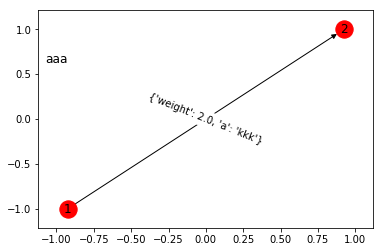

In [38]:
import networkx as nx
import matplotlib.pyplot as plt


dg = nx.DiGraph()
dg.add_edge(1,2)
dg.nodes[1]['bbb'] = 'aaa'
dg[1][2]["weight"] = 2.0
dg[1][2]["a"] = 'kkk'
e1 = dg.get_edge_data(1,2)
print('bbb' in dg.nodes[1])

pos = nx.spring_layout(dg)
nx.draw_networkx(dg, arrows=True, with_labels=True)
node_labels = nx.get_node_attributes(dg,'bbb')
nx.draw_networkx_labels(dg, pos, labels = node_labels)
edge_labels = nx.get_edge_attributes(dg,'weight')
nx.draw_networkx_edge_labels(dg, pos, labels = edge_labels)
plt.show()


In [ ]:
# Paper: Using Predictive Prefetching to Improve World Wide Web Latency, 1996
# With time_buffer

import networkx as nx
import csv

DG = nx.DiGraph()
window_size = 3
time_threshold = 10
file_name = '/Users/felicitia/Documents/workspaces/Python/Prefetch/aaa.csv'
time_buffer = []
url_buffer = []
time_idx = 1
url_idx = 2

def updateDG(time_buffer, url_buffer):
    head_node = url_buffer[0]
    head_time = time_buffer[0]
    i = 1
    while i < len(url_buffer):
        if((time_buffer[i]-head_time) <= time_threshold):
            if DG.has_edge(head_node, url_buffer[i]):
                DG[head_node][url_buffer[i]]['weight'] 
        i += 1
        
    return

with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        # add elements to fill the buffer
        if line_count < window_size:
            time_buffer.append(row[time_idx])
            url_buffer.append(row[url_idx])
            if line_count == window_size - 1:
                updateDG(time_buffer, url_buffer)
        # update the buffer
        else:
            time_buffer.pop(0)
            time_buffer.append(row[time_idx])
            url_buffer.pop(0)
            url_buffer.append(row[url_idx])
            updateDG(time_buffer, url_buffer)
        line_count += 1
    print(f'Processed {line_count} lines.')